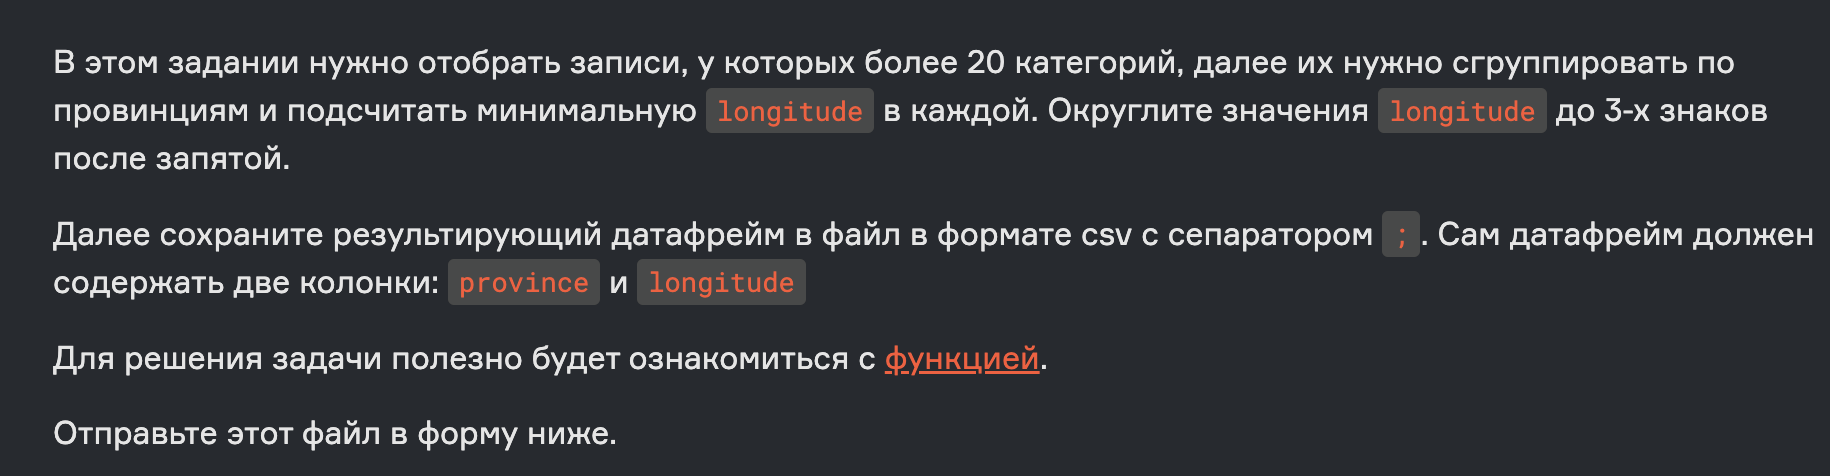

In [1]:
import pandas as pd
df = pd.read_csv('data.csv')

In [15]:
df

,id,address,categories,city,cuisines,dateAdded,dateUpdated,latitude,longitude,menus.category,menus.currency,menus.dateSeen,menus.description,menus.name,name,province
0,AVwc__cikufWRAb51QjV,610 Commercial St,"Restaurant Delivery Service,Restaurants,Pizza,...",Atchison,Restaurant Delivery Service,2016-03-02T11:49:34Z,2017-02-01T18:04:44Z,39.561570,-95.121020,NaN,NaN,2017-02-01T18:04:44Z,NaN,Taco,Gambino's Pizza,KS
1,AVwc__cikufWRAb51QjV,610 Commercial St,"Restaurant Delivery Service,Restaurants,Pizza,...",Atchison,Restaurant Delivery Service,2016-03-02T11:49:34Z,2017-02-01T18:04:44Z,39.561570,-95.121020,NaN,NaN,2016-03-02T11:49:34Z,"Beef, onion, cheddar cheese, lettuce, refried...",Taco,Gambino's Pizza,KS
2,AVwc__dF_7pvs4fz1Ncy,9521 Morton Davis Dr,"Golf Course, American Restaurant, and Resort",Patterson,NaN,2016-10-14T01:58:25Z,2016-10-14T01:58:25Z,37.401855,-121.266703,NaN,NaN,2016-10-14T01:58:25Z,"Beef barbacoa or chicken, spanish rice, pico d...",Smotherd Burrito,Diablo Grande Golf & Country Club,Grayson
3,AVwc__kCByjofQCxkdm-,10550 W I 25 Frontage Rd,Fast Food Restaurant,Longmont,NaN,2016-09-09T17:30:34Z,2016-10-04T05:15:17Z,NaN,NaN,NaN,NaN,2016-09-09T17:30:34Z,NaN,Sausage Burrito,Mcdonald's,Niwot
4,AVwc__WtByjofQCxkdkR,8495 W 3rd St,"Mexican Restaurant Mid-City West,Mexican Resta...",Los Angeles,Mexican,2016-05-19T11:50:25Z,2016-09-11T00:06:37Z,34.080724,-118.389578,NaN,NaN,2016-05-19T11:50:25Z,"Wahoo, avocado, cabbage, pico de gallo and av...",Wahoo Tacogrilled,Baja Fresh Mexican Grill,Bicentennial
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77255,AVzRLlQNLD2H7whiWdH_,3919 24th St.,Restaurant,San Francisco,Mexican,2017-06-22T19:01:33Z,2017-06-22T19:01:33Z,37.751392,-122.430180,NaN,USD,2017-06-22T16:40:06.448Z,"meat, rice, beans, guacamole, sour cream, chee...",Super Burrito,La Casona Taqueria,California
77256,AVzRLlQNLD2H7whiWdH_,3919 24th St.,Restaurant,San Francisco,Mexican,2017-06-22T19:01:33Z,2017-06-22T19:01:33Z,37.751392,-122.430180,NaN,USD,2017-06-22T16:40:06.448Z,"melted cheese, rice, beans & salsa",Steamed Broccoli Burrito,La Casona Taqueria,California
77257,AVzRLlQNLD2H7whiWdH_,3919 24th St.,Restaurant,San Francisco,Mexican,2017-06-22T19:01:33Z,2017-06-22T19:01:33Z,37.751392,-122.430180,NaN,USD,2017-06-22T16:40:06.448Z,meat & salsa,Regular Taco,La Casona Taqueria,California
77258,AVzRLlQNLD2H7whiWdH_,3919 24th St.,Restaurant,San Francisco,Mexican,2017-06-22T19:01:33Z,2017-06-22T19:01:33Z,37.751392,-122.430180,NaN,USD,2017-06-22T16:40:06.448Z,"meat, rice, beans & salsa",Regular Burrito,La Casona Taqueria,California


In [37]:
# Шаг 1: Разделение значений в колонке 'categories' по запятой
df['categories_list'] = df['categories'].str.split(',')

# Шаг 2: Подсчет количества категорий и фильтрация
df_filtered = df[df['categories_list'].apply(len) > 20]

# Шаг 3: Группировка по провинциям и нахождение минимальной долготы
df_group = df_filtered.groupby('province').agg(
    {
        'longitude': 'min'
    }).reset_index()

# Шаг 4: Округление значения долготы до 3 знаков после запятой
df_group['longitude'] = df_group['longitude'].round(3)
print(df_group)
# Шаг 5: Сохранение в CSV с сепаратором ;
df_group.to_csv('df_group.csv', sep=';', index=False)



        province  longitude
0             AZ   -110.136
1             CA   -122.417
2             DC    -77.075
3          G P O    -73.990
4             KY    -87.455
5             MA    -71.055
6             MD    -77.453
7             NY    -76.794
8   St Simons Is    -81.394
9             TX    -94.939
10            VA    -77.093
11            WA   -122.383
12            WI    -89.377


In [32]:
# df_group.to_csv('df_group.csv', sep=';', index = False)